# 시퀀셜 데이터의 길이 파악하기

In [1]:
import os
from datetime import datetime as dt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '/dev/shm/data/3.preprocessed'

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'merged-data-over-5-240321.csv'))
print(df.shape)
df.sample(5)

(276847, 4)


,uid,recipe_sno,rating,datetime
39884,96480788,6894096,5.0,2020-11-15 20:16
17188,hskim4127,7018883,NaN,NaN
193360,75926689,6929293,5.0,2021-01-25 13:39
182343,91192272,3450146,5.0,2019-12-16 22:40
5016,33006056,6879915,NaN,NaN


In [4]:
# sort by uid, datetime
sorted_df = df.sort_values(by=['uid', 'datetime'], na_position='first')
sorted_df.sample(5)

,uid,recipe_sno,rating,datetime
178381,10912821,6857278,5.0,2020-10-17 11:21
28152,39744183,6977345,NaN,NaN
194133,58279933,6908498,5.0,2023-05-21 19:03
263272,37206998,6891816,5.0,2022-01-12 15:17
267774,32362626,6840310,5.0,2023-10-03 09:14


In [5]:
# groupby seq
seq_df = sorted_df.groupby('uid').agg({'recipe_sno': list})
seq_df.sample(5)

,recipe_sno
uid,
24900330,"[6968044, 6950781, 6950376, 6949766, 6948855, ..."
17536804,"[6912137, 6866453, 6938845, 6848377, 6858795]"
48902769,"[6841018, 6865170, 6859263, 5419824, 6868963, ..."
14209108,"[6854350, 6887218, 6831734, 6843865, 6896724, ..."
58428023,"[6850895, 6852196, 6838648, 6836180, 6833703, ..."


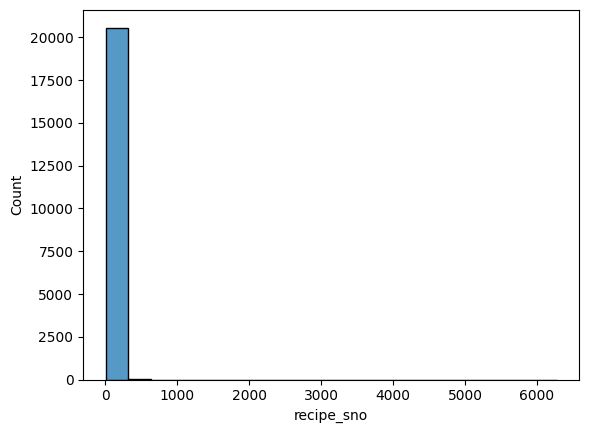

In [6]:
# sequence length
sns.histplot(seq_df.recipe_sno.apply(len), bins=20)
plt.show()

> 데이터가 좌측으로 매우 치우침

In [7]:
seq_df.recipe_sno.apply(len).describe()

count    20588.000000
mean        13.447008
std         58.350925
min          5.000000
25%          6.000000
50%          8.000000
75%         13.000000
max       6273.000000
Name: recipe_sno, dtype: float64

> 75% 의 유저가 13개 이하의 인터렉션을 가지며, 극도로 많은 인터렉션을 가지는 유저도 존재함

<Axes: xlabel='recipe_sno', ylabel='Count'>

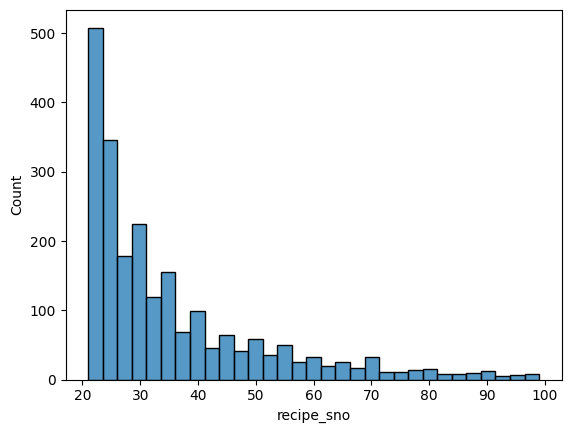

In [8]:
sns.histplot(seq_df.recipe_sno.apply(len)[(seq_df.recipe_sno.apply(len) > 20) & (seq_df.recipe_sno.apply(len) < 100)])

In [10]:
seq_df.recipe_sno.apply(len)[seq_df.recipe_sno.apply(len) > 20].shape, \
seq_df.recipe_sno.apply(len)[seq_df.recipe_sno.apply(len) > 100].shape, \
seq_df.recipe_sno.apply(len)[seq_df.recipe_sno.apply(len) > 1000].shape,\
seq_df.recipe_sno.shape

((2393,), (135,), (6,), (20588,))

> 총 2만 명의 사용자 중 10% 정도는 20개 이상의 인터렉션을 가지며, 100개 이상, 1000개 이상의 인터렉션을 가지는 유저는 매우 드문 편. sequence length가 길수록 더 많은 사용자의 상호작용을 캡처하나, 학습 및 추론 속도를 느리게 할 수 있음. 따라서 max_seq_length를 20, 50, 100으로 두고 실험하여, 성능과 속도 측면에서 비교해보고 결정하자.